# Przygotowanie

Przygotowanie Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko. {nr_albumu}_{imię}_{nazwisko}_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji.

# Drzewa decyzyjne

Podobnie jak w przypadku maszyny wektorów nosnych (SVC), drzewa decyzyjne sa wszechstronnym algorytmem uczenia maszynowego. Mogą słuzyc do rozwiazywania problemów zarówno klasyfikacji, jak i regresji. W przeciwieństwie do modelu SVC drzewa decyzyjne nie wymagają restrykcyjnego przygotowania danych (np. skalowania cech). Drzewa decyzyjne składaja sie z korzenia oraz gałezi prowadzacych do kolejnych wierzchołków. W wezłach - wierzchołkach z których wychodzi co najmniej jedna krawedź, sprawdzany jest pewien warunek. Na jego podstawie, wybierana jest gałaz prowadząca do kolejnego wierzchołka. Dana obserwacja zostaje zaklasyfikowana do konkretnej klasy po przejściu od korzenia do liscia i przypisaniu do tej obserwacji klasy, z danego liscia (nie wychodza z niego wezły potomne).

Za pomocą drzew decyzyjnych otrzymać możemy potężne modele zdolne do nauki złożonych zbiorów danych.

###  Las losowy

Klasyfikator lasu losowego jest klasyfikatorem zespołowym złozonym z drzew decyzyjnych. Klasyfikator ten wprowadza dodatkową losowość do wzrostu drzew. Nie wyszukuje on najlepszej cechy podczas podziału na wezły, ale szuka najlepszej cechy wsród losowego podziału cech. Powoduje to wieksze zróznicowanie powstałych w klasyfikatorze drzew. Losowe lasy są bardziej odporne na nadmierne dopasowanie się do zbioru treningowego, jakie spotykane jest podczas użycia drzew decyzyjnych.

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [2]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 50, 1: 50, 2: 50}

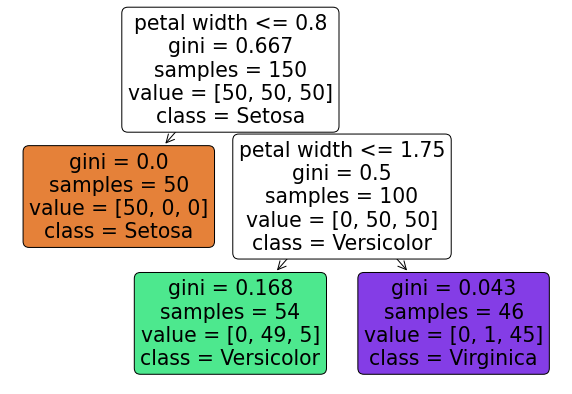

In [3]:
import matplotlib.pyplot as plt
from pydotplus import graph_from_dot_data
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.tree import plot_tree

tree = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=1)
tree.fit(X, y)

plt.figure(figsize=(10, 7))

plot_tree(tree, 
          filled=True, 
          rounded=True,
          class_names=['Setosa', 
                       'Versicolor',
                       'Virginica'],
          feature_names=['petal length', 
                         'petal width']) 

plt.show()

### Jak podejmowane są decyzje w drzewie?

Klasyfikacja próbki zaczyna się zawsze od korzenia (węzeł na samej górze grafu). W węźle zadawane jest pytanie (w przykładnie powyżej czy długość płatka jest mniejsza od 0.8). Jeśli prawda przechodzimy do węzła potomnego lewego, w przeciwnym razie do prawego. Przechodząc do węzła lewego dochodzimy do **liścia** (leaf node, nie posiada węzłów potomnych) - w taki wypadku żadne pytanie nie jest zadawane, przydzielana jest już tylko klasa do danej obserwacji. 

W przypadku, gdy skierujemy się ku węzłowi prawemu (nie jest już liściem) zadajemy kolejne pytanie, aż dojdziemy do liścia.

Znaczenie atrybutów:

- *samples* - oznacza ilość wyznaczonych próbek dla danego węzła (zgadza się to w przedstawionym przypadku z ilością próbek dla danych klas)
- *value* - określa ilość przykładów uczących z każdej klasy jakie przynależą do danego węzła.
- *gini* - miara zanieczyszczenia węzła (0 oznacza, że wszystkie próbki w węźle należą do jednej klasy - idealna klasyfikacja)

Wskaźnik Gingiego:
    \begin{equation*}
 G_{i} = 1 - \sum_{k=1}^{n} p_{i, k}^{2}
\end{equation*}
gdzie $p_{i,k}$ oznacza współczynie występowania klas k, wśród próbek uczących w węźle i.

Jako wskaźnik zanieczyszczenia (parametr *entropy*), użyta może zostać również miara entropii. Wynosi ona 0, w przypadku, gdy wszystkie informacje są takie same - wszystkie próbiki w węźle należą do jednej klasy.

Entropia:
    
\begin{equation*}
    H_{i} = - \sum_{k=1\\ p_{i,k} \neq 0}^{n} p_{i, k} log(p_{i,k})
\end{equation*}


Różnice pomędzy tymi dwoma miarami są zazwyczaj bardzo znikome i nie wypływają znacząco na skuteczność działania klasyfikatora. Dla zainteresowanych szczegółami zapraszam do lektury: https://sebastianraschka.com/faq/docs/decision-tree-binary.html, https://towardsdatascience.com/the-simple-math-behind-3-decision-tree-splitting-criterions-85d4de2a75fe

W jakim momencie przestać budować drzewo decyzyje?

Problemy rozważane w uczeniu maszynowym mają zazwyczaj sporą liczbę cech, która może powodować wysoko rosnące skomplikowanie drzewa (jego wielkość, sporą ilość węzłów oraz podziałów w węzłach). Tak utworzone drzewa mogą powodować nadmierne dopasowanie do danych treningowych.

Algorytm drzewa decyzyjnego posiada parametry, które ustalane są podczas uczenia. Jak wspomniano, może powodować to przetrenowanie klasyfikatora (nadmierne dopasowanie do danych uczących). Aby tego uniknąć, dobrym rozwiązaniem okazuje się ograniczenie swobody działania klasyfikatora. Podobnie jak w przypadku klasyfikatora SVC, również dla drzewa decyzyjnego zdefinowane zostały parametry regularyzacyjne:

- *max_depth* - maksymalna wysokość drzewa
- *min_samples_split* - minimalna liczba próbek, jakie będą w węźle (przed podziałem)
- *min_samples_leaf* - minimalna liczba próbek, jakie będą w liściu
- *max_leaf_nodes* - maksymalna ilość liści
- *max_features* - maksymalna liczba cech używana do dzielenia węzła.

Modyfikacja tych parametrów powoduje regularyzację drzewa i zmniejsza ryzyko przetrenowania.

## Zadania

### Zadanie 1

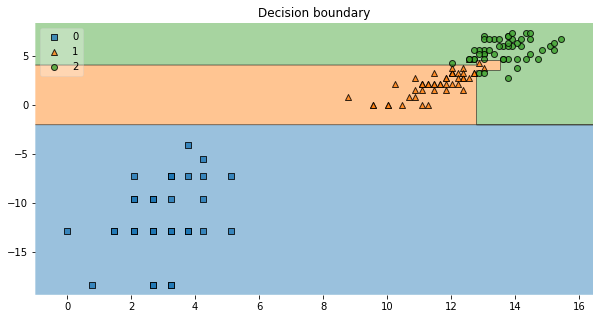

In [4]:
from mlxtend.plotting import plot_decision_regions

tree = DecisionTreeClassifier(max_depth=10, criterion="entropy", random_state=1)
tree.fit(np.log(X ** 8), y)
fig = plt.figure(figsize=(10,5))
labels = ['Decision Tree']
fig = plot_decision_regions(X=np.log(X ** 8), y=y, clf=tree, legend=2)
plt.title("Decision boundary")
plt.show()

Jakie wnioski możne sformuować na bazie granic decyzyjnych przedstawionych powyżej? W momencie pojawianie się dodatkowej próbki klasy *zielonej* (2), zostanie ona dobrze sklasyfikowana? Czy klasyfikator posiada dobre właściwości generalizujące?

### YOUR ANSWER HERE
Granice decyzyjne generalnie są dobrze wyznaczone za wyjątkiej obszaru na granicy 2 i 1. 
Jeśli jakaś obserwacja będzie się w nim znajdować - może sotać źle sklasyfikowana.

### Zadanie 2

Proszę wytrenować zbiór z użyciem algorytmu drzewa decyzyjnego. Proszę pamiętać o odpowienim podziale na zbiór uczący i treningowy. Klasyfikator powinien być trenowany na zbiorze treningowym, a wynik jego skuteczności po trenowaniu obliczany w oparciu o zbiór testowy.

Proszę przygotować wyniki, trenując algorytm z użyciem różnych parametrów - należy przygotować wykresy (oś pionowa określa skuteczność, pozioma wartość parametru) pokazujące jak zmienia się skuteczność działania w zależności od zastosowanych wartości parametrów. Proszę o przygotowanie odpowiedniego porównania (tabela), co można zaobserwować?

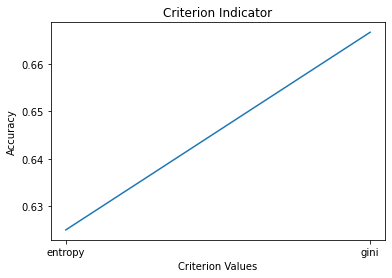

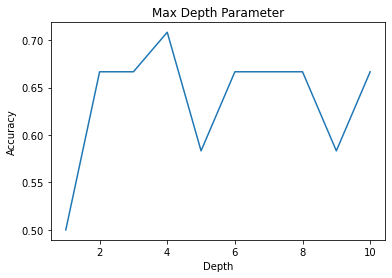

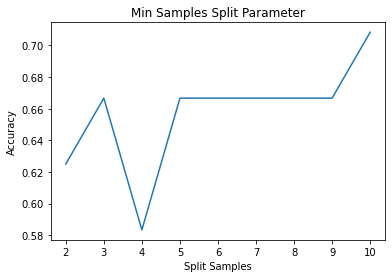

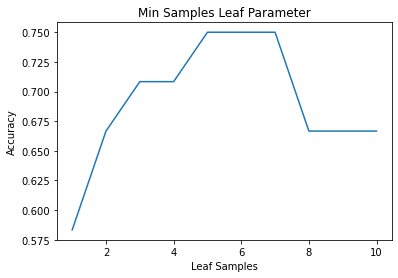

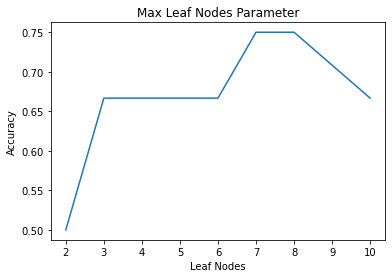

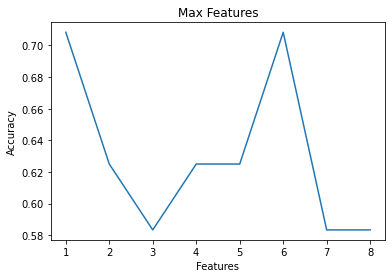

In [5]:
#YOUR CODE HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

def accuracy(clf, x_test, y_test):
    predicted = clf.predict(x_test)
    accuracy = np.sum(predicted == y_test) / len(y_test)
    return accuracy

def print_plot(x_label, y_label, title, vals_list, accuracy_list):
    plt.figure()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.plot(vals_list, accuracy_list)

# Data
data_input = pd.read_csv('Breast.csv')
data_input.head()
data_values = data_input.values
X = data_values[:, :-1]
Y = data_values[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

# Criterion Indicator
criterion_values = ['entropy', 'gini']
accuracy_list = []
for cv in criterion_values:
    tree = DecisionTreeClassifier(criterion=cv)
    tree.fit(X_train, Y_train)
    accuracy_list.append(accuracy(tree, X_test, Y_test))

print_plot('Criterion Values', 'Accuracy', 'Criterion Indicator', 
           criterion_values, accuracy_list)

# Max Depth
max_deapth_values = range(1, 11)
accuracy_list = []
for mdv in max_deapth_values:
    tree = DecisionTreeClassifier(max_depth=mdv)
    tree.fit(X_train, Y_train)
    accuracy_list.append(accuracy(tree, X_test, Y_test))
    
print_plot('Depth', 'Accuracy', 'Max Depth Parameter', 
           max_deapth_values, accuracy_list)
    
# Min Samples Split
min_samples_split_values = range(2, 11)
accuracy_list = []
for mssv in min_samples_split_values:
    tree = DecisionTreeClassifier(min_samples_split=mssv)
    tree.fit(X_train, Y_train)
    accuracy_list.append(accuracy(tree, X_test, Y_test))
    
print_plot('Split Samples', 'Accuracy', 'Min Samples Split Parameter', 
           min_samples_split_values, accuracy_list)

# Min Samples Leaf
min_samples_leaf_values = range(1, 11)
accuracy_list = []
for mslv in min_samples_leaf_values:
    tree = DecisionTreeClassifier(min_samples_leaf=mslv)
    tree.fit(X_train, Y_train)
    accuracy_list.append(accuracy(tree, X_test, Y_test))
    
print_plot('Leaf Samples', 'Accuracy', 'Min Samples Leaf Parameter', 
           min_samples_leaf_values, accuracy_list)

# Max Leaf Nodes
max_leaf_nodes_values = range(2, 11)
accuracy_list = []
for mlnv in max_leaf_nodes_values:    
    tree = DecisionTreeClassifier(max_leaf_nodes=mlnv)
    tree.fit(X_train, Y_train)
    accuracy_list.append(accuracy(tree, X_test, Y_test))
    
print_plot('Leaf Nodes', 'Accuracy', 'Max Leaf Nodes Parameter', 
           max_leaf_nodes_values, accuracy_list)

# Max Features
max_features_values = range(1, len(X[0]))
accuracy_list = []
for mfv in max_features_values:     
    tree = DecisionTreeClassifier(max_features=mfv)
    tree.fit(X_train, Y_train)
    accuracy_list.append(accuracy(tree, X_test, Y_test))
    
print_plot('Features', 'Accuracy', 'Max Features', 
           max_features_values, accuracy_list)

### Odpowiedź
Można zauważyć, że lepszą wartością parametru Criterion - jest "gini", jednak różnice są bardzo znikome. Udowadnia to stwierdzenie że wartości te nie wypływają znacząco na skuteczność działania klasyfikatora.

W pozostałych przypadkach możemy zauważyć bardziej znaczący wzrost skuteczności w zależności od konkretnego współczynnika. Najlepiej jest to zauważalne w przypadku paramteru Max Features - dla wartości 8 jest to 50%, podczas gdy dla wartości 7 to 80%.

### Zadanie 3

Drzewa decyzyjne mogą również szacować przewdopodobieństwo przynależności danej próbki do określonej klasy. Proszę przeprowadzić odpowiednie trenowanie klasyfikatora i określić jak zmienia się prawdopodobieństwo przynależności różnych próbek. Wystarczy odnaleźć odpowienią właściwość klasyfikatora i pokazać jakie jest zwracane prawdopodobieństwo dla kilku przykładów.

In [6]:
#YOUR CODE HERE
def print_probability(clf, x_test, title):
    df = pd.DataFrame(tree.predict_proba(x_test), columns=clf.classes_)
    print(f'--- {title} ---')
    print(df)
    print()

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, Y_train)
print_probability(tree, X_test, 'Max depth = 2')

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, Y_train)
print_probability(tree, X_test, 'Max depth = 3')

tree = DecisionTreeClassifier(max_leaf_nodes=4)
tree.fit(X_train, Y_train)
print_probability(tree, X_test, 'Max leaf nodes = 4')

tree = DecisionTreeClassifier(max_leaf_nodes=5)
tree.fit(X_train, Y_train)
print_probability(tree, X_test, 'Max leaf nodes = 5')


--- Max depth = 2 ---
         1.0       2.0
0   0.800000  0.200000
1   0.800000  0.200000
2   0.388889  0.611111
3   0.800000  0.200000
4   0.388889  0.611111
5   0.800000  0.200000
6   0.388889  0.611111
7   0.800000  0.200000
8   0.114286  0.885714
9   0.800000  0.200000
10  0.388889  0.611111
11  0.800000  0.200000
12  0.388889  0.611111
13  0.388889  0.611111
14  0.800000  0.200000
15  0.800000  0.200000
16  0.800000  0.200000
17  0.800000  0.200000
18  0.114286  0.885714
19  0.800000  0.200000
20  0.114286  0.885714
21  0.800000  0.200000
22  0.114286  0.885714
23  0.800000  0.200000

--- Max depth = 3 ---
         1.0       2.0
0   0.952381  0.047619
1   0.952381  0.047619
2   0.875000  0.125000
3   0.571429  0.428571
4   0.875000  0.125000
5   0.952381  0.047619
6   0.000000  1.000000
7   0.952381  0.047619
8   0.363636  0.636364
9   0.952381  0.047619
10  0.000000  1.000000
11  0.952381  0.047619
12  0.000000  1.000000
13  0.000000  1.000000
14  0.571429  0.428571
15  0.571429

### Zadanie 4

Proszę wyrysować granice decyzyjne dla klasyfikatora drzewa decyzyjnego utworzonego we wcześniejszym zadaniu. Jakie można sformuować wnioski?

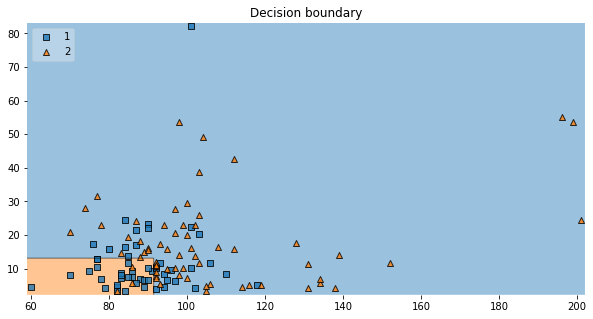

In [7]:
# #YOUR CODE HERE
X2 = data_values[:, [2, 7]]
Y2 = data_values[:, -1]

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2)
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X2_train, Y2_train)

fig = plt.figure(figsize=(10,5))
Y2 = Y2.astype('int32')
fig = plot_decision_regions(X=X2, y=Y2, clf=tree, legend=2)
plt.title("Decision boundary")
plt.show()

### Odpowiedź
Granice niestety tak wyglądają ze względu na fakt, że istnieje tylko możliwość uwzględnienia dwóch parametrów przy ich tworzeniu.